<a href="https://colab.research.google.com/github/Harsh-COE/ML/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
x = np.array([i*np.pi/180 for i in range(60,300,4)])

np.random.seed(10) #Setting seed for reproducibility

y = np.sin(x) + np.random.normal(0,0.15,len(x))

df= pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

for i in range(2,16): #power of 1 is already there
 colname = 'x_%d'%i #new var will be x_power
 df[colname] = df['x']**i

print(df)

           x         y        x_2         x_3         x_4          x_5  \
0   1.047198  1.065763   1.096623    1.148381    1.202581     1.259340   
1   1.117011  1.006086   1.247713    1.393709    1.556788     1.738948   
2   1.186824  0.695374   1.408551    1.671702    1.984016     2.354677   
3   1.256637  0.949799   1.579137    1.984402    2.493673     3.133642   
4   1.326450  1.063496   1.759470    2.333850    3.095735     4.106339   
5   1.396263  0.876795   1.949551    2.722087    3.800751     5.306850   
6   1.466077  1.034349   2.149381    3.151156    4.619837     6.773034   
7   1.535890  1.015673   2.358957    3.623098    5.564680     8.546734   
8   1.605703  1.000035   2.578282    4.139955    6.647537    10.673970   
9   1.675516  0.968332   2.807354    4.703767    7.881237    13.205140   
10  1.745329  1.049762   3.046174    5.316577    9.279177    16.195219   
11  1.815142  1.150751   3.294742    5.980426   10.855325    19.703961   
12  1.884956  0.806297   3.553058    6

In [30]:
X=df.drop(['y'],axis=1)

Y=df.iloc[:,1]

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)

X_scaled=np.insert(X_scaled,0,values=1,axis=1)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [32]:
lamba=0.001

A=X_train.T.dot(X_train)
I=np.identity(len(A),dtype='int')
B=A+lamba*I

C=np.linalg.inv(B)

D=C.dot(X_train.T)

beta=D.dot(Y_train)

In [33]:
Y_predict=X_test.dot(beta)

print(Y_predict)

[ 0.91886872  0.98089512 -0.37858576 -0.91792187  0.91412707 -0.85423698
 -0.14821958 -0.97220769  0.93402742 -0.82549473 -0.94551187 -0.96007629
  0.00343604  0.96535837 -0.91475809  0.80080899  0.98037703  0.98392925]


In [34]:
error=Y_test-Y_predict

square_error=np.power(error,2)

sum_square_error=np.sum(square_error)

mean_square_error=sum_square_error/len(Y_predict)

print(mean_square_error)

rms_error=np.sqrt(mean_square_error)

print(rms_error)

y_mean=np.mean(Y_test)

total_variance=np.sum((Y_test-y_mean)**2)

print(1-sum_square_error/total_variance)

0.009032448090750001
0.09503919239319114
0.9880291811035271


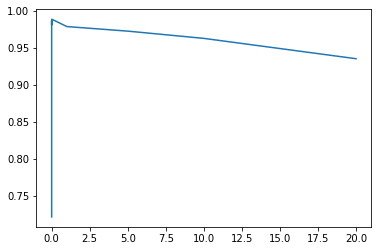

In [35]:
lambda_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
import matplotlib as plt
from sklearn import metrics

R2_score=[]

for i in range(len(lambda_ridge)):

  A=X_train.T.dot(X_train)

  B=A+lambda_ridge[i]*I

  C=np.linalg.inv(B)

  D=C.dot(X_train.T)

  beta=D.dot(Y_train)

  Y_predict=X_test.dot(beta)

  R2_score.append((metrics.r2_score(Y_test,Y_predict)))

  
import matplotlib.pyplot as plt


plt.plot(lambda_ridge,R2_score)

In [36]:
from sklearn.linear_model import Ridge

from sklearn import metrics

ridge=Ridge(alpha=0.001, normalize=True)

model=ridge.fit(X_train,Y_train)

Y_predict=model.predict(X_test)

print(metrics.r2_score(Y_test,Y_predict))

0.9889244857152456


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [37]:
from sklearn.linear_model import Lasso

from sklearn import metrics

lasso=Lasso(alpha=0.001, normalize=True)

model=lasso.fit(X_train,Y_train)

Y_predict=model.predict(X_test)

print(metrics.r2_score(Y_test,Y_predict))

0.9780622256563285


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
